У цьому домашньому завданні ми продовжуємо працювати з набором даних `Yulu`, з яким почали працювати в "hw 4.3. Робота з DataFrame. Діаграма розсіювання.". Фокус цього ДЗ в тому, аби будувати візуалізації використовуючи методи pandas.DataFrame. Це дозволяє будувати візуалізації ще швидше.

Документація до тої частини бібліотеки, з якою тут працюємо

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

### Профіль колонок набору даних:

- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів

0. Імпортуйте бібліотеки `matplotlib.pyplot` та `pandas`.  Завантажте дані з файла yulu_rental.csv у pandas.DataFrame df.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data_path = '../data/yulu_rental.csv'
df = pd.read_csv(data_path)

1.1. Користуючись групою методів `pandas.plot` побудуйте гістограму кількості зареєстрованих користувачів з налаштуваннями за замовченням (тобто без жодних додаткових параметрів).

(array([4459., 2694., 1775.,  873.,  461.,  262.,  142.,  126.,   81.,
          13.]),
 array([  0. ,  88.6, 177.2, 265.8, 354.4, 443. , 531.6, 620.2, 708.8,
        797.4, 886. ]),
 <BarContainer object of 10 artists>)

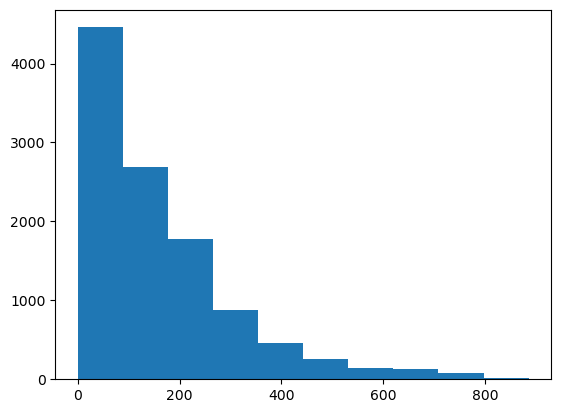

In [4]:
plt.hist(df['registered'])

1.2. Побудуйте гістограму для цього ж показника, але задайте кількість бінів рівну 30 і задайте прозорість 0.5. Додайте підписи за осями ОХ і ОУ, а також назву дівграмі. Опишіть свої спостереження. Що бачите? Чому дані можуть мати такий розподіл?

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


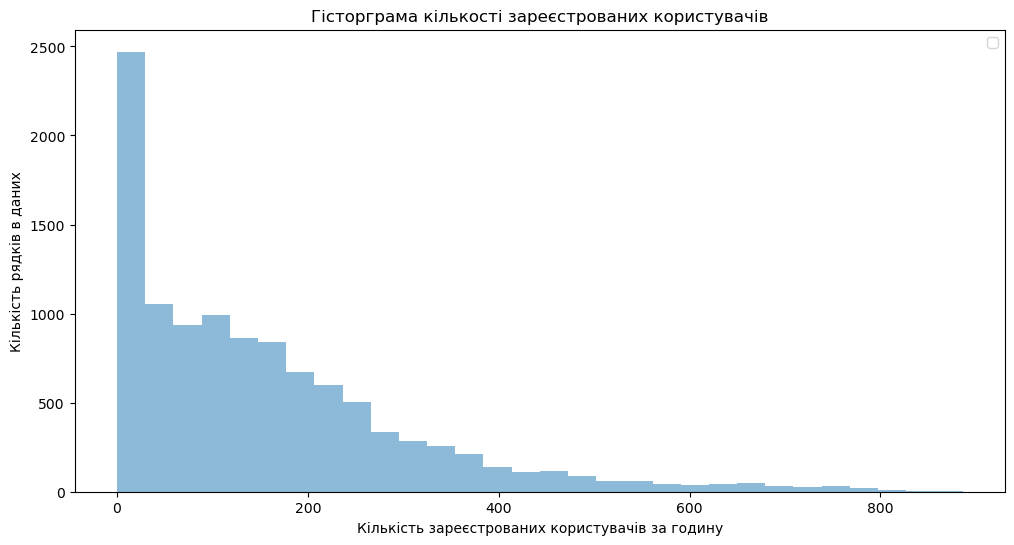

In [5]:
plt.figure(figsize=(12,6))
plt.hist(df['registered'], bins=30, alpha=0.5)
plt.xlabel('Кількість зареєстрованих користувачів за годину')
plt.ylabel('Кількість рядків в даних')
plt.legend()
plt.title('Гісторграма кількості зареєстрованих користувачів')
plt.show();

Має вийти щось таке (може бути без сітки):

![](https://drive.google.com/uc?export=view&id=1Pb3UD8cmg_V0LLf8A4feOepTDXMqEAf8)


--------

Перетворимо колонку `datetime` на тип даних `pd.datetime` - це нам доопоможе в подальшій роботі. Просто запустіть колонку нижче і занатуйте собі цей метод роботи з колонкою, в якій міститься дата і час.

In [6]:
df['datetime'] = pd.to_datetime(df.datetime)

І створимо нову колонку `dayofweek` для того, аби дослідити детальніше, коли у нас немає поїздок.

In [7]:
df['dayofweek'] = df.datetime.dt.day_of_week

Переглянемо значення в колонкці. Колонка dayofweek містить числа від 0 до 6 включно, де 0 відповідає понеділку.

In [8]:
df[['datetime','dayofweek']][df.dayofweek==0].head()

,datetime,dayofweek
47,2011-01-03 00:00:00,0
48,2011-01-03 01:00:00,0
49,2011-01-03 04:00:00,0
50,2011-01-03 05:00:00,0
51,2011-01-03 06:00:00,0


2. Проведемо аналіз нульової активності зареєстрованих користувачів за днями тижня. Для цього
  1. Виберіть з набору даних усі записи, де кількість зареєстрованих користувачів дорівнює 0. Групуйте ці записи за днями тижня (`dayofweek`) та обчисліть кількість нульових записів для кожного дня.
  2. Після групування, використайте графік типу "bar" для візуалізації результатів. Кожна смужка на графіку має відображати кількість записів у даних для цього дня тижня, коли не було зареєстровано жодної поїздки користувачами.

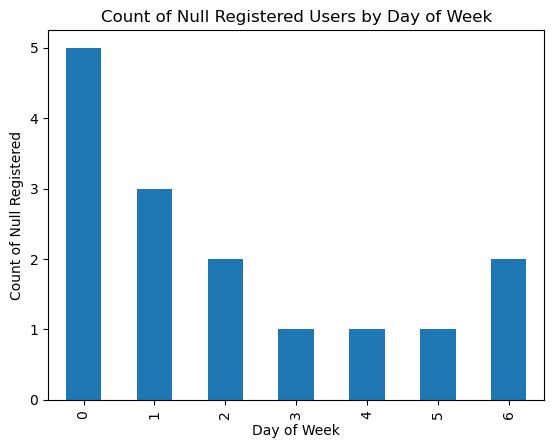

In [14]:
# Вибір записів, де кількість зареєстрованих користувачів дорівнює 0
df_registered_null = df[df['registered'] == 0]

# Групування за днями тижня та підрахунок кількості нульових записів для кожного дня
df_registered_null_by_dayofweek = df_registered_null.groupby('dayofweek').size()
df_registered_null_by_dayofweek.plot(kind='bar', xlabel='Day of Week', ylabel='Count of Null Registered', title='Count of Null Registered Users by Day of Week')
plt.show()

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1FXNzMa7rTdBQDwXSQfPTtPX5CHZK9A4X)

3. Проведемо аналіз загальної кількості зареєстрованих покристувачів за різними погодними умовами.
Згрупуйте всі дані за погодними умовами і визначте суму кількості зареєстрованих користувачів для кожної погодньої умови.
Побудуйте стовпачасту діаграму, які відобразить результат обчислень.
Зверніться до опису даних та дайте відповідь: чи побудована візуалізація має логічний сенс з точки зору опису даних.

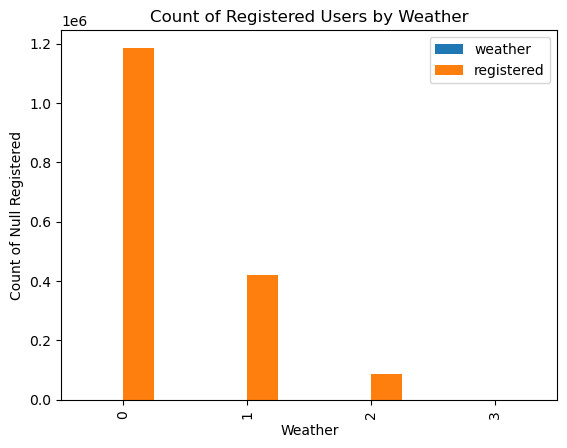

In [16]:
df_registered_by_weather = df.groupby('weather')['registered'].sum().reset_index()
df_registered_by_weather.plot(kind='bar', xlabel='Weather', ylabel='Count of Null Registered', title='Count of Registered Users by Weather')
plt.show();

Дана діаграма дає зрозуміти пряму залежність між погодними умовами та кількістю зареєстрованих коистувачів. При ясній погоді - така кількість найбільша що є цілком логічним. При найгіршій погоді - кількість нульова, що свідчить про те, що неможливо керувати велосипедом при поганій погоді - Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман

4. Користуючись групою методів pandas.plot побудуйте діаграму розсіювання (scatter plot) між вологістю і кількістю зареєстрованих користувачів. Встановіть прозорість на 0.5, а також налаштуйте діаграму так, аби колір кожної точки відповідав значенню температури за відчуттями (`atemp`).

Проаналізуйте графік, що спостерігаєте?

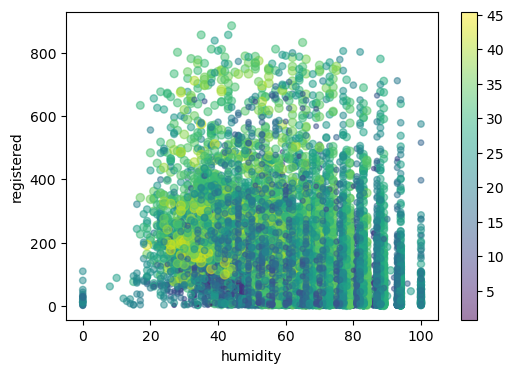

In [21]:
col_x = 'humidity'
col_y = 'registered'
color_feature = 'atemp'

plt.figure(figsize=(6,4))
plt.scatter(df[col_x], df[col_y], alpha=0.5,
            s=df[color_feature], c=df.atemp)
plt.xlabel(col_x)
plt.ylabel(col_y)
plt.colorbar();

Ми можемо побачити наступне:
    1. Найбільша кількість зареэстрованих користувачів спостерігається при вологості від 30 до 45
    2. При чому при вологості від 20 до 40 - температура відчувається як найвища - ми бачимо на графіку скупчення точок світло зеленого кольору.
    3. Бачимо також вброси - тобто дані що трохи вибиваються із загального обсягу даних - це кількість зареєстрованих користувачів при вологості 0 і при вологості 100 - для аналізу можливо краще ці показники видалити.
    4. При помірній вологості і відносно високвій температурі - вище 30 градусів ми бачимо найбільшу кількість зареєстрованих користувачів, що ще раз доводить що користування цими послугами є дуже погодно залежними.

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1trepX8z23YwyP9P8cAko9IzwOZkvLo8y)